PHYS 381 - Computational Physics I - Final Exam

FILE: final_exercise2.ipynb

NAME: David (Scott) Salmon

UCID: 30093320

DATE: 2023-04-18

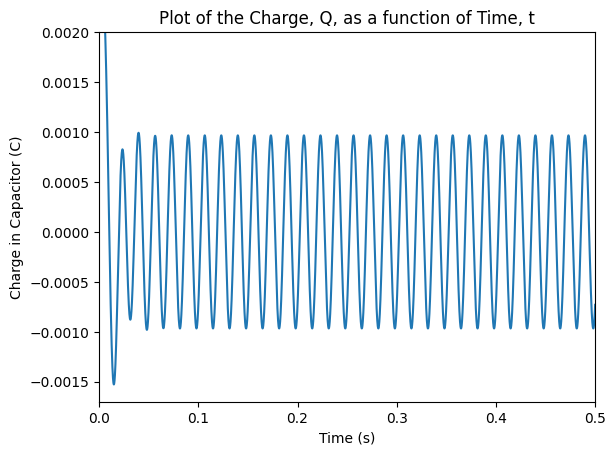

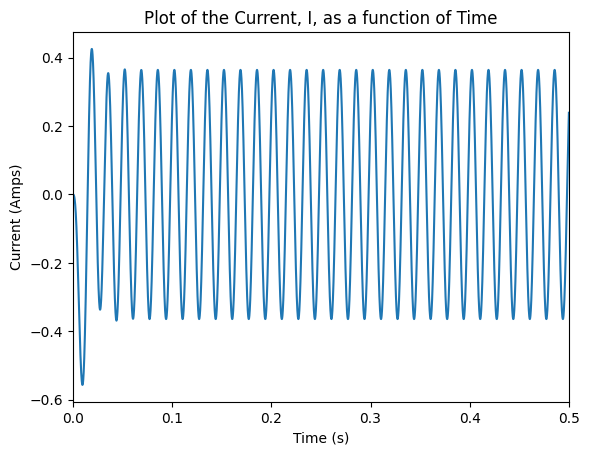

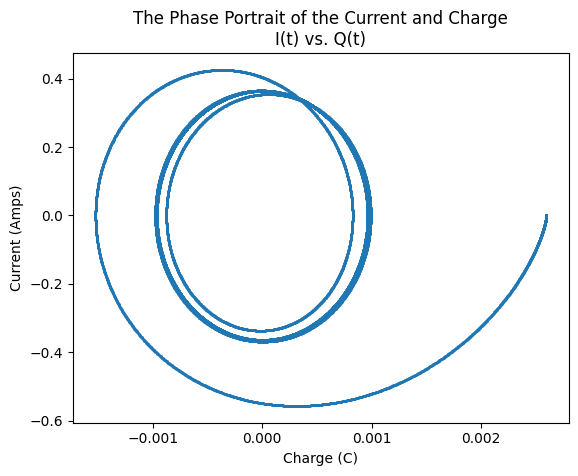

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

#The seed for the RNG generator was: 800816569666100101
#It gave a value of 82 miliHenries, 18 Ohms and 260 microFarads

#this is setting all required parameters
L = 82e-3 #mH
R = 18 #Ohms
C = 260e-6 #microFarads
V_0 = 10 #Volts
frequency = 60 #Hertz
time = 0 #Initial time, seconds
Q = C * V_0  #initial charge, microCoulombs (since Q_0/C = 10 Volt)
I = 0 #Initial Current, Amps
dt = 0.00001   #delta t, seconds
current_List, charge_List, time_List = [I], [Q], [time] #initializing lists

#Function that calculates the voltage based on the frequency and time elapsed
def V(t):
    omega = 2 * math.pi * frequency #ω = 2πf
    voltage = V_0 * math.cos(omega * t) #V(t) = V_0*cos(ωt)
    return voltage

#First Order DE shown in Eq(6) - dq/dt = current 
def function(charge, current, time):
    result = -(R/L) * current - (1/(L * C)) * charge + (1/L) * V(time)
    return result

#begin integrating using Runge-Kutta method
for i in range(60000):
    k1a = dt * I
    k1b = dt * function(Q, I, time)
    k2a = dt * (I + k1b/2)
    k2b = dt * function(Q + k1a/2, I + k1b/2, time + dt/2)
    k3a = dt * (I + k2b/2)
    k3b = dt * function(Q + k2a/2, I + k2b/2, time + dt/2)
    k4a = dt * (I + k3b)
    k4b = dt * function(Q + k3a, I + k3b, time + dt)
    Q = Q + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
    I = I + (k1b + 2 * k2b + 2 * k3b + k4b) / 6
    time = time + dt #iterating time
    
    #adding values to their lists
    time_List.append(time) 
    current_List.append(I)
    charge_List.append(Q)

#plots Q(t) vs time
plt.figure()
plt.plot(time_List, charge_List)
plt.xlim(0,0.5) #setting x and y axis for a better viewing
plt.ylim(-0.0017,0.002) #^^^^
plt.title('Plot of the Charge, Q, as a function of Time, t')
plt.xlabel('Time (s)')
plt.ylabel('Charge in Capacitor (C)')
plt.show()

#plots I(t) vs time
plt.figure()
plt.plot(time_List, current_List)
plt.xlim(0,0.5) #setting x axis for better viewing
plt.title('Plot of the Current, I, as a function of Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (Amps)')
plt.show()

#plots phase portrait of I(t) vs Q(t)
plt.figure()
plt.scatter(charge_List, current_List, s=1)
plt.title('The Phase Portrait of the Current and Charge\nI(t) vs. Q(t)')
plt.xlabel('Charge (C)')
plt.ylabel('Current (Amps)')
plt.show()


### CODE WORKFLOW AND FINAL RESULTS

The seed for the RNG generator was: 800816569666100101. When this seed is inputted into the random_generator_circuit_values_ex2_final.ipynb notebook given on the D2L, the values generated are: 82 milliHenry (mH), 18 Ohm, and 260 microFarads. These values are saved into variables L, R and C respectively with proper unit conversions into Henries and Farads. Next, other given variables such as the initial voltage, frequency, intial charge and current, and more are defined.

There are two user-defined functions in those code. The first is simply calculating the voltage through using the V(t) = V_0 * cos(ωt) function given in the final manual. The second function is depicting the differential equation given in Eq(6) of the final manual. The dq/dt is replaced with the calculated current value.

After everything is defined, we are ready to integrate. The Runge-Kutta algorithm from the second assignment is then employed to integrate and find the change in current and charge values over every dt iteration. What this algorithm is doing is simultaneously using the midpoint and endpoints of "trapezoids" in a weighted average to determine the change in values over a very small dt. It calculates 4 slopes; two at the midpoint and then one at each end. The weighted averages in the code occur at the last step, the k1 and k2 slopes are weighted more than the k3 and k4. After that the slopes are have been averaged, the di and dq are calculated per dt and then they're added to the current and charge before the dt occured. After this, those values are added to the current and charge values and then added to their respective lists. This process is repeated thousands of times to numerically integrate the function. 

Finally, the three required graphs are plotted. The first is a Charge vs. Time graph, and the second is the Current vs Time graph. The steady state solutions appears very quickly in both plots, both achieving it well before 0.1s have occured. What this means is the motion has become periodic, i.e. when the frequency stays constant.

The third plot is the phase portrait (Current vs Charge). Again, the steady state solution appears in this plot, and it shows oscillatory motion and that the motion is non-chaotic.